In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

* 참고 머신 러닝 인 액션 정리 - 3장 - 의사결정트리 <br>
http://javacan.tistory.com/entry/MachineLearningInAction-03-DecisitionTree-ID3

# Splitting datasets one feature at a time: decision trees


* 의사 결정 트리 (스무고개)


* Decision Tree Flowchart
    - Decision Block (의사결정 블록, 사각형)
    - Terminal Block (단말 블록, 타원형)
    - Branch (가지)
    
    
* 장점
    - 적은 계산 비용
    - 이해하기 쉬운 학습 결과
    - 누락값 처리
    - 분류와 무관한 특징 처리 가능


* 단점
    - 과적합되기 쉬움 (너무 복잡한 형태)
    
    
* 적용
    - 수치형값, 명목형값

---- 이진트리도 있으나 주로 정렬할때 사용 (여기서는 사용하지 않는다.)<br>
kNN 알고리즘은 데이터에대한 추가적으로 생각할 정보를 주지 않는다. 

_알쓸신잡) <br>
Btreeindex, bitmapindex.. 오라클의 저장단위는 물리적인단위, 논리적인 단위로 나뉘어 져있다. 논리적인 단위가 있는 이유 다른 file system 이여도 저장 가능하도록 하기위해서. NTFS 는 제한없음, FAT32 4G 가 최대 <br>
오라클 데이터 주소값 : 6자리3자리6자리3자리 > 오파블로 (objectId(segmentID), 파일번호(몇번째파일), 데이터블럭ID, RowID)_

## 3.1 Tree construction

** ID3 알고리즘**

* ID3 를 이용한 트리 생성 순서 

    1. 데이터를 가장 잘 나눌 수 있는 특징을 먼저 찾아서 데이터 집합을 하위 집합으로 분할
        - 정보 이득 (Informaion Gain) 이 가장 큰 특징 (현상태와 그다음상태의 정보 차이) 
        - 엔트로피 (Entropy 정보량) 가 가장 크게 낮아지는 특징
        - 정보량이 많다. = 선택사항이 많다. = 불확실 하다. = 복잡성, 불확정성
    2. 해당 특징을 포함하는 노드 생성
    3. 하위 집합의 모든 데이터가 같은 클래스에 속하면 해당 하위 집합에 대한 분류 종료
    4. 2의 경우가 아니라면 이 하위 집합에 대해 1을 적용
    5. 모든 데이터가 분류될 때까지 (=모든 하위 집합에 대해) 1~4 반복
        - 재귀적방법으로 해결
        - factorial(n) : n x (n-1) x (n-2).... =>  fact(n) = n x fact(n-1)
    
    
노드에 비에 feature 정보가 적을 땐 남아있는 타갯들을 보고 다수결로 해결 


### $ 트리 구조 생성 의사코드 

    데이터 집합에 있는 모든 아이템이 같은 부류항복에 속하는지 확인 :
        if 그렇다면, 분류 항목 표시를 반환
        else 아니면
            데이터를 분할하는 가장 좋은 속성을 찾음
            데이터 집합 분할
            가지 노드 생성
                for 각노드마다 분할 반복
                    create branch 를 호출하고 가지노드에 결과 추가 
            가지 노드를 반환함 


General approach to decision trees

    1. Collect: 모든 방법
    2. Prepare: 명목형값, 연속형값(수지형)은 양자화를 통해 이산형 값으로 변환 
        - 양자화 (Quantizaton) : 끊어지는 값으로 만듬, 이산
    3. Analyze: 모든방법, 트리를 만든 후 시각적 트리 검토
    4. Train: 트리형태로 구조 구성
    5. Test: 학습된 트리로 오류율(error rate) 계산
    6. Use: 모든 지도학습에서 사용 (데이터를 이해하기 위해 사용되기도 함)

    >> Knowledge Representation : 생성된 tree 구조 


* 의사결정트리 알고리즘 종류
    - ID3 (Iterative Dichotomiser 3)
    - C4.5 (successor of ID3)
    - C5.0 (successor of ID4)
    - CART (Classification And Regression Tree)
    - CHAID (CHi-squared Automatic Interaction Detector) : 이 알고리즘은 분류 트리를 계산할 때 다단계 분할을 수행한다.
    - MARS (Multivariate adaptive regression splines) : 더 많은 수치 데이터를 처리하기 위해 결정 트리를 사용한다.
    - 조건부 추론 트리 (Conditional Inference Trees) : 과적합을 피하기 위해 여러 테스트에 대해 보정 분할 기준으로 비 - 파라미터 테스트를 사용하는 통계 기반의 방법이다. 이 방법은 편견 예측 선택 결과와 가지 치기가 필요하지 않다.
    
    https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95
    
    
* 가장 적합한 분할 기준 선택 방법
 - 정보 이득
 - 지니 불순도 : 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표
 - 분산 감소 
 
 
* target 정보의 yes 로 판단할지 no 로 판단할지는 양적인 조건으로 판단 quantitative 예) 물고기다. 아니다.  

## 3.1.1 Information gain

* 교제 용어 
    - class : target 예) 물고기인지 아닌지
    - class label : target 의 실제 value 값 예) yes, no
    - label : feature column 값 예) 지느러미여부, 아가미가있나


* 데이터를 분할하기 이전 이후의 정보량(엔트로피) 변화
* 정보 이득이 가장 큰 특징에 대한 분할 수행
* 정보 이득으로 정보의 불확실성(엔트로피) 감소

### 개별 정보량과 엔트로피 

$log_2p(x_i)$

* 개별 정보량 
    * 확률이 낮을 수록 개별 정보량은 커짐 : 엔트로피가 커지는데 기어
        * 로그의 결과에 -1 을 곱한 이유 (0~1 확률은 1/n 분수니까, log(1) 이하의 값은 음수가 나옴) <br>
        확률이 낮을수록 개별 정보량은 커짐 > 엔트로피가 커짐 
    * 정보를 전달(표현) 하는데 몇 자리 2진수(몇비트) 면 충분한가
        * 밑이 2 인 log (컴퓨터로 정보를 전달 하려고 하기 때문에)         
  
  
* 엔트로피 
    * 개별 정보량에 대한 기댓값 <br>
        $H=-\sum_{i=1}^{n}p(x_i)\log_2 P(x_i)$
    * 불확실한 정도, 무질서 정도
    * 확률이 낮은 사건이 많을수록 정보의 엔트로피(불확실성)이 커진다.
        - 로그함수 0 에 가까울수록 -y 값이 커짐
    * 정보의 불확실성이 높다.
        = 어떤 값이 나올지 알기 힘들다.
    * 엔트로피가 높은 원인
        - 모든 사건의 확률이 균등 
            개별정보가 기대값이 가장 많을때, 동전 앞,뒤면 나오는 확률이 같을때<br>
            앞면이 나올 확률이 높은 경우 (예, 8/10) 정보의 불확실 성은 줄어든다. (앞면이 많이 나올테니까) 정보량이 적다. (외부에 남아있는 정보가 적다. 뒷면이 나올 확률 2/10)             
        - 확률이 낮은 사건이 많음 (정보가 다양) 
      


<img src='03.entropy.png' width=500>
--- 엔트로피의 성질 : 집합에 범주가 고르게 분포할 수록 엔트로피 값은 높다. (불확실성 상태가 크다.)
의사결정 나무에서는 엔트로피가 높을 수록 Target 구분을 잘 못해주는 속성 필드가 되며, 낮을 수록 구분을 잘 해주는 유의한 속성 필드가 된다.



* [code] 3.1 calcShannonEnt : 데이터 집합의 새넌 엔트로피 계산 

입력 데이터 집합을 순회하면서 타겟 라벨의 빈도수를 구함

In [4]:
import trees
import numpy as np

In [11]:
marinedata, labels = trees.createDataSet()
marinedata, labels

([[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']],
 ['no surfacing', 'flippers'])

In [12]:
# 가능한 모든 분류에 대한 딕셔너리 만들기 
numentries = len(marinedata); numentries
labelcounts = {}

# for 문 
i=0
featvec = marinedata[i]; featvec
current_targetlabel = featvec[-1]; current_targetlabel
# 새로운 키 인 경우 사전에 저장 (for 문으로 여러개의 분류도 가능 )
if current_targetlabel not in labelcounts.keys():
    labelcounts[current_targetlabel] = 0
    labelcounts
labelcounts[current_targetlabel] += 1
labelcounts

5

[1, 1, 'yes']

'yes'

{'yes': 0}

{'yes': 1}

-- 사전의 get 함수 활용

In [13]:
# 새로운 키 인 경우 사전에 저장 (다른방법) 
# if current_targetlabel not in labelcounts.keys():labelcounts[current_targetlabel] = 0
# labelcounts[current_targetlabel] += 1

labelcounts[current_targetlabel] = labelcounts.get(current_targetlabel, 0) + 1
labelcounts

{'yes': 2}

In [21]:
import math
# 새넌 엔트로피 구하기 
shannonEnt = 0.0
i = 0
# for 문 
key = labelcounts.keys()[i]; key
labelcounts[key]
prob = float(labelcounts[key])/numentries
shannonEnt -= prob * math.log(prob,2) #log base 2
shannonEnt # yes 일때의 확률이 나옴 

'yes'

2

0.5287712379549449

* [code] trees calcShannonEnt 사용 

In [25]:
reload(trees)
marinedata, labels = trees.createDataSet()
shannonEnt = trees.calcShannonEnt(marinedata); shannonEnt

<module 'trees' from 'trees.py'>

0.9709505944546686

shannonEnt 는 target 종류가 늘어날 수록 값이 커진다. <br>
    
    yes 2/5, no 3/5 = shannonEnt 0.9 
        -> yes 1/5, no 3/5, maybe(추가) 1/5 = shannonEnt 1.3 

    정보량이 증가, 복잡도가 높아짐 

## 3.1.2 Splitting the dataset

데이터를 첫 번째 feature 값 (라벨) 로 분할하되 그 값이 '1' 인 생물의 데이터 집합 얻기 <br>
집합을 분할하기 위해서 feature 를 선택해야 한다.     

데이터를 2차원으로 분류 > feature 가 2개 

어떤 feature 를 선택할 것인가


* [code] splitDataSet(dataSet, axis, value) feature 의 value 값에 따라 data 모으기 

In [26]:
retdataset = []
marinedata, labels = trees.createDataSet()

In [40]:
# 첫번째 feature(axis=0) 가 1인 것만 뽑기 
axis=1; value=1

i=0
# for 문 
featvec = marinedata[i]; featvec
# value 가 1 이면 저장하기 해당 feature 값 나머지 데이터 저장 
if featvec[axis] == value:
    # [1,1,'yes'] 에서 [ 만 선택 
    reducedfeatvet = featvec[:axis]; reducedfeatvet
    # [1,1,'yes'] 에서 나머지 1,'yes'] 만 선택 
    # append 면 [, [1,'yes']] 중첩으로 들어감 풀어져 나옴 
    # extend [1, 'yes']
    reducedfeatvet.extend(featvec[axis+1:]); reducedfeatvet
    # append 로 중접으로 쌓음  [[1, 'yes'], [1, 'yes']]
    retdataset.append(reducedfeatvet); retdataset

# axis=1 인 경우 [1, 0, yes] 중에서 1 고르고 yes 를 골라서 붙임 [1, yes]

[1, 1, 'yes']

[1]

[1, 'yes']

[[1, 'yes'], [1, 'yes'], [1, 'yes']]

In [ ]:
# 다른 방법 
# if featvec[axis] == value:
#     reducedfeatvet = featvec[:axis]
#     reducedfeatvet.extend(featvec[axis+1:])
#     retdataset.append(reducedfeatvet)
if featvec[axis] == value:
    del featvec[1]
    retdataset.append(featvec); retdataset

* [code] trees splitDataSet 사용 (모든 feature value 에 대해서 엔트로피 구하기) 

In [37]:
reload(trees)
# 첫번째 피처 값 (라벨)이 1인 데이터 집합의 엔트로피 구하기 
feat01 = trees.splitDataSet(marinedata, 0, 1); feat01
trees.calcShannonEnt(feat01)

<module 'trees' from 'trees.pyc'>

[[1, 'yes'], [1, 'yes'], [0, 'no']]

0.9182958340544896

In [38]:
# 첫번쨰 피처 값이 0인 데이터 집합의 엔트로피 
feat00 = trees.splitDataSet(marinedata, 0, 0); feat00
trees.calcShannonEnt(feat00) # 전부 같은 데이터만 있음 분류할 필요가 없다.

[[1, 'no'], [1, 'no']]

0.0

In [39]:
feat10 = trees.splitDataSet(marinedata, 1, 0); feat10
trees.calcShannonEnt(feat10)
feat11 = trees.splitDataSet(marinedata, 1, 1); feat11
trees.calcShannonEnt(feat11)

[[1, 'no']]

0.0

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

1.0

* [code] chooseBestFeatureToSplit 데이터 분할 시 가장 좋은 속성 선택하기 

In [64]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1     # 마지막 label 값 제외 
    baseEntropy = trees.calcShannonEnt(dataSet) # 아직 분할되지 않은 값 
    print("\n == 최적 피처 찾기 시작 ==")
    # 타입이 확실하지 않은 경우 {} 에 값을 넣어줌  {name} -> .formant(name=numFeatures) 
    print("피처 개수 : {0}, 기본 엔트로피 :{1}".format(numFeatures, baseEntropy))
    bestInfoGain = 0.0; bestFeature = -1  # 어떤 feature 일때 엔트로피 값이 큰가 
    
    for i in range(numFeatures):          # iterate over all the features 
        #create a list of all the examples of this feature
        featList = [example[i] for example in dataSet] 
        uniqueVals = set(featList)       # get a set of unique values
        newEntropy = 0.0
        print("\n>>> feature {}'s value list : {}".format(i, featList))
        print("  unique value of the above feature : {}".format(uniqueVals))
        
        for value in uniqueVals:
            subDataSet = trees.splitDataSet(dataSet, i, value)
            print("\n\t SubDataSet(feat#: {}, feat-val: {}): {}"\
                  .format(i, value, subDataSet))
            
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * trees.calcShannonEnt(subDataSet)   
            print("\t Probagility of the subdataset : {}".format(prob))
            print("\t Entropy of the subdataset : {}".format(trees.calcShannonEnt(subDataSet)))
            print("\t Cumulative Entropy : {}".format(newEntropy))
            
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        print("\n  The determined Entorypy for feature {}: {}".format(i, newEntropy))
        print("  Information Gain for feature {}: {}".format(i, infoGain))
        
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
            
        print("\n  bestFeature : {}".format(bestFeature))
    return bestFeature                      #returns an integer


In [65]:
myDat, features = trees.createDataSet()
myDat; features 

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

['no surfacing', 'flippers']

In [66]:
bestFeature = chooseBestFeatureToSplit(myDat)
bestFeature


 == 최적 피처 찾기 시작 ==
피처 개수 : 2, 기본 엔트로피 :0.970950594455

>>> feature 0's value list : [1, 1, 1, 0, 0]
  unique value of the above feature : set([0, 1])

	 SubDataSet(feat#: 0, feat-val: 0): [[1, 'no'], [1, 'no']]
	 Probagility of the subdataset : 0.4
	 Entropy of the subdataset : 0.0
	 Cumulative Entropy : 0.0

	 SubDataSet(feat#: 0, feat-val: 1): [[1, 'yes'], [1, 'yes'], [0, 'no']]
	 Probagility of the subdataset : 0.6
	 Entropy of the subdataset : 0.918295834054
	 Cumulative Entropy : 0.550977500433

  The determined Entorypy for feature 0: 0.550977500433
  Information Gain for feature 0: 0.419973094022

  bestFeature : 0

>>> feature 1's value list : [1, 1, 0, 1, 1]
  unique value of the above feature : set([0, 1])

	 SubDataSet(feat#: 1, feat-val: 0): [[1, 'no']]
	 Probagility of the subdataset : 0.2
	 Entropy of the subdataset : 0.0
	 Cumulative Entropy : 0.0

	 SubDataSet(feat#: 1, feat-val: 1): [[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]
	 Probagility of the subdataset : 0.8
	

0

* [code] 트리 만들기 

In [80]:
reload(trees)

<module 'trees' from 'trees.py'>

In [102]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    print("\n=== Begin CreateTree() ===")
    print("\r class labels for training set : {}".format(classList))
    # \r 그줄 맨앞으로감
        
    # 재귀함수 stop 조건 #1 : 리프노드 만드는 조건이 값이 전부 같을때
    if classList.count(classList[0]) == len(classList): 
        print("  stopcondition 1 Leaf Node's value :{}".format(classList[0]))
        return classList[0]
    
    # 재귀함수 stop 조건 #2 : 더이상의 featuer 가 없고(나눌수없다.), label이 다를떄 다수결로 정함
    # featuer 개수가 2개 인데 target의 값이 3개 인경우 (수면위, 지느러미) target : 물고기다. 아니다. 모른다. 
    if len(dataSet[0]) == 1: 
        print("  stopcondition 2 Leaf Node's value :{}".format(trees.majorityCnt(classList)))
        return trees.majorityCnt(classList) # 다수결로 정해진 값을 받음
    
    bestFeat = trees.chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    print("  Current Gest Feature: {}".format(bestFeatLabel))
    
    myTree = {bestFeatLabel:{}}
    print("  Current Tree: {}".format(myTree))
    
    # best 한 값을 첫번쨰 node 로 만들고 만들어진 label 은 삭제 후 전달 
    del(labels[bestFeat])
    print("  Class labels remained: {}".format(labels))
    
    featValues = [example[bestFeat] for example in dataSet]
    print("  DataSet for best feature: {}".format(featValues))
    uniqueVals = set(featValues)
    
    # unique value가 있는만큼 재귀함수를 호출
    for value in uniqueVals:
        subLabels = labels[:]       
        print("    \r sublabels: {}".format(subLabels))
        myTree[bestFeatLabel][value] = createTree(trees.splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree   

In [103]:
myDat, features = trees.createDataSet()
createTree(myDat, features)
# {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
# no surfacing : 0 이면 no, no surfacing : 1 이면 yes (물위로 안올라오면 물고기가 아니다.)


=== Begin CreateTree() ===
 class labels for training set : ['yes', 'yes', 'no', 'no', 'no']
  Current Gest Feature: no surfacing
  Current Tree: {'no surfacing': {}}
  Class labels remained: ['flippers']
  DataSet for best feature: [1, 1, 1, 0, 0]
 sublabels: ['flippers']

=== Begin CreateTree() ===
 class labels for training set : ['no', 'no']
  stopcondition 1 Leaf Node's value :no
 sublabels: ['flippers']

=== Begin CreateTree() ===
 class labels for training set : ['yes', 'yes', 'no']
  Current Gest Feature: flippers
  Current Tree: {'flippers': {}}
  Class labels remained: []
  DataSet for best feature: [1, 1, 0]
 sublabels: []

=== Begin CreateTree() ===
 class labels for training set : ['no']
  stopcondition 1 Leaf Node's value :no
 sublabels: []

=== Begin CreateTree() ===
 class labels for training set : ['yes', 'yes']
  stopcondition 1 Leaf Node's value :yes


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [104]:
# 리스트 안에 해당 값 개수 세기 
l = [1,2,3,4,2,2,1,1]
l.count(1)
lnum = np.array(l)
lnum[lnum == 1].sum()

3

3

# 3.2 Plotting trees in Python with Matplotlib annotations
- figure : 전체 영역 
- axes : 축포함 그래프 영역 
- axis : 오로지 축만

* 그래프 영역 설명 
https://matplotlib.org/faq/usage_faq.html


## 3.2.1 Matplotlib annotations
* matplot annotiation : 그래프위에 설명 
https://matplotlib.org/users/annotations.html
    
    
* annotate() method


* 두개의 점 고려, 각점은 튜블로 표현
    - x,y : 적용될 위치 
    - xytext : 출력할 문자 위치


* 기본적으로 text 에서 annotation 으로 그려짐 


* 좌표계 (xy, xytext 의 좌료계 지정 : xycoords, textcooreds)
    - figure 계열 : points, pixel, fraction (0.0, 1.1)
    - axes 계열 : points, pixel, fraction
    - data : (기본값) 


* polar annotation : 극좌표계

** treePlotter.py ** 참고 

* [code] getNumLeafs : leaf node 알아오기

In [144]:
import treePlotter as tplt
import matplotlib.pyplot as plt

In [145]:
# myTree: {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]     # myTree.keys() : 'no surfacing'
    print("\n myTree.keys() : {}".format(firstStr))
    subDict = myTree[firstStr]
    print("\r myTree[firstStr] : {}".format(subDict))
    
    print("\r subDict.keys() : {}".format(subDict.keys()))
    
    for key in subDict.keys():    
        # __name__ : type 의 이름 내부함수 사용 
        if type(subDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(subDict[key]) # 하위 부분만 넘김 
            print("\n\t numLeafs : {}".format(numLeafs))
        else:   numLeafs +=1
            
    print("\n Determined numLeafs: {}".format(numLeafs))
    return numLeafs

In [146]:
myDat, features = trees.createDataSet()
myTree = trees.createTree(myDat, features)
myTree
getNumLeafs(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


 myTree.keys() : no surfacing
 myTree[firstStr] : {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}
 subDict.keys() : [0, 1]

 myTree.keys() : flippers
 myTree[firstStr] : {0: 'no', 1: 'yes'}
 subDict.keys() : [0, 1]

 Determined numLeafs: 2

	 numLeafs : 3

 Determined numLeafs: 3


3

* [code] getTreeDepth : 트리 깊이 알아오기 

In [147]:
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1    
        
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [148]:
myDat, features = trees.createDataSet()
myTree = trees.createTree(myDat, features)
myTree
getTreeDepth(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

2

* [code] createPlot() : 텍스트 주석을 가진 트리 노느 플롯

In [149]:
# 노드 그리기 : xy=parentPt 화살표 받는 값, xytext=centerPt 화살표 시작 값, 
# va vertical : 세로중심, arrowprops : 왼쪽으로 화살표가 그려지게함 
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

In [150]:
# 예시로 그려보기 
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

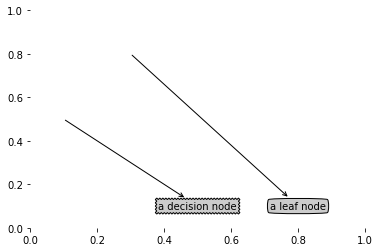

In [151]:
createPlot()

## 3.2.2 Constructing a tree of annotations

* 리프 노드의 개수 - 각 요소의 적절한 x 축 방향 크기 계산에 필요
* 트리의 깊이 - 각 요소의 적절한 y 축 방향 크기 계산에 필요 


* [code] plotTree : Tree 그리기 

In [176]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [177]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    
    axprops = dict(xticks=[], yticks=[])
        # **axprops xticks=[], yticks=[] 형태로 넘어감 
    # createPlot.ax1
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    # axprops : 이런변수는 private 한 변수 
    # createPlot.ax1 : 이렇게 선언하면 public 한 변수가됨 (권장하지 않음..)
    
    plotTree.totalW = float(tplt.getNumLeafs(inTree))
    plotTree.totalD = float(tplt.getTreeDepth(inTree))
    
    # -0.5 : 구해진 좌표에서 -0.5를 해서 가운데로 보냄
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0; # 제일 위에 
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

In [178]:
def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = tplt.getNumLeafs(myTree)  #this determines the x width of this tree
    depth = tplt.getTreeDepth(myTree)
    
    firstStr = myTree.keys()[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    
    # 다음 노드가 그려질 위치 계산 
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            # 위치값만 변경해줌 
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            # 노드 출력 
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 텍스스 출력 
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
            
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

<module 'treePlotter' from 'treePlotter.pyc'>

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

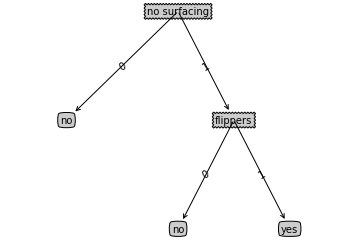

In [179]:
reload(tplt)
myDat, features = trees.createDataSet()
myTree = trees.createTree(myDat, features)
myTree
createPlot(myTree)

In [172]:
def func1():
    x = 10
    func1.y = 20
    return x+func1.y

In [175]:
func1()
func1.y

30

20

# 3.3 Testing and storing the classifier

분류기 검증 및 저장 

## 3.3.1 Test: using the tree for classification



* [code] trees.py classify() : 기존의 의사결정 트리를 위한 분류 함수  

In [186]:
def classify(inputTree,featLabels,testVec):
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print("\nfirstStr {}".format(firstStr))
    print("secondDict {} ".format(secondDict))
    print("featIndex {}".format(featIndex))
    print("key {}".format(key))
    print("valueOfFeat {}".format(valueOfFeat))
    
    if isinstance(valueOfFeat, dict): 
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    
    return classLabel

In [191]:
myDat, features = trees.createDataSet()
myTree = trees.createTree(myDat, features[:]) 
# features[:] 또는 list(features) : 리스트를 복제해서 넘김 
myTree
# myDat, features = trees.createDataSet() # createTree에서 del 시킴
classify(myTree, features, [1,1]) # features 순으로 [1,0] 새로운 데이터 

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


firstStr no surfacing
secondDict {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} 
featIndex 0
key 1
valueOfFeat {'flippers': {0: 'no', 1: 'yes'}}

firstStr flippers
secondDict {0: 'no', 1: 'yes'} 
featIndex 1
key 1
valueOfFeat yes


'yes'

## 3.3.2 Use: persisting the decision tree

- 분류한 문제마다 의사결정 트리를 작성하는 것은 시간 낭비
- 훈련된 의사결정을 저장해 두었다가 필요할 때 불러내어 사용 
    
https://docs.python.org/3/library/pickle.html
    
* pickle : 데이터를 주고 받는데 있어서 일반화 시키는 방법 
        파이썬 객체 구조를 직렬화/역질렬화하기 위한 바이너리 프로토콜 구현
        직렬화라는 말은 메모리나 저장공간에 담을 수 있도록 직렬

    - dump() : 메서드는 열린 파일(파일과 유사한 객체)로 직렬화
    - dumps() : 메서드는 문자열로 직렬화합
    - load() : 메서드는 열려 있는 파일과 유사한 객체로부터 역직렬화
    - loads() 메서드는 문자열로부터 역직렬화합니다.

* [code] trees.py storeTree() : pickle 을 가지고 의사결정 트리 유지시키는 방법   

In [192]:
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'w')
    pickle.dump(inputTree,fw)
    fw.close()

In [193]:
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

In [196]:
filename = 'data/ch03/DecisionTree.txt'
storeTree(myTree, filename)
grabTree(filename)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# 3.4 Example: using decision trees to predict contact lens type

Example: using decision trees to predict contact lens type
1. Collect: Text file provided.
2. Prepare: Parse tab-delimited lines.
3. Analyze: Quickly review data visually to make sure it was parsed properly. The final tree will be plotted with createPlot().
4. Train: Use createTree() from section 3.1.
5. Test: Write a function to descend the tree for a given instance.
6. Use: Persist the tree data structure so it can be recalled without building the tree; then use it in any application.


* 용어 
    - persistence : 지속성, 연속성, 관계형 데이터베이스의 관리를 표현 (연동)
        (like 자바 퍼시스턴스 API, mybatis, ibatis, hibernate...) 



In [200]:
fr = open('data/ch03/lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lenses

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

In [208]:
lenses_feature = ['age', 'prescript', 'astigmatic', 'tear_rate']

In [209]:
# Training 
reload(trees)
lenses_tree = trees.createTree(lenses, lenses_feature[:]);
lenses_tree

<module 'trees' from 'trees.pyc'>

{'tear_rate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

<module 'treePlotter' from 'treePlotter.pyc'>

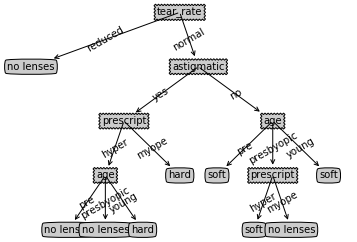

In [210]:
# plot 
reload(tplt)
tplt.createPlot(lenses_tree)

In [214]:
# 신규 데이터로 검증 
my_staus = ['pre', 'myope', 'yes', 'normal']
trees.classify(lenses_tree, lenses_feature, my_staus)

'hard'

#### 과적합 (overfitting) 문제 
- 가지치기, 노드 자르고 붙이기 등...